In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.ramanflow.read_data import ReadData as rd
from tools.ramanflow.prep_data import PrepData as rpd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [4]:
# import savitzky_golay as sg from scipy.signal import savgol_filter
from scipy.signal import savgol_filter

Define analytes' peaks

In [5]:
carbendazim_peaks = [625, 727, 1009, 1270, 1468]
acetamiprid_peaks = [630, 827, 1111, 2177]
acephate_peaks = [273, 377, 466, 1102]

### Read the data from 05/19/2023

Only Carbendazim was measured.

In [6]:
f_sup, colloids_20s = rd.read_data('data/20230519 532 Raman SEM Colloids/1] 20s Colloids.tif')
_, colloids_30s = rd.read_data('data/20230519 532 Raman SEM Colloids/2] 30s Colloids.tif')
_, colloids_1min = rd.read_data('data/20230519 532 Raman SEM Colloids/3-1] 1min Colloids.tif')
_, colloids_2min = rd.read_data('data/20230519 532 Raman SEM Colloids/4-1] 2min Colloids.tif')
_, colloids_3min = rd.read_data('data/20230519 532 Raman SEM Colloids/5] 3min Colloids.tif')
_, colloids_10min = rd.read_data('data/20230519 532 Raman SEM Colloids/6] 10min Colloids.tif')
_, car_20s = rd.read_data('data/20230519 532 Raman SEM Colloids/1] 20s Colloids+Carbendazim.tif')
_, car_30s = rd.read_data('data/20230519 532 Raman SEM Colloids/2] 30s Colloids+Carbendazim.tif')
_, car_1min_v1 = rd.read_data('data/20230519 532 Raman SEM Colloids/3-1] 1min Colloids+Carbendazim.tif')
_, car_1min_v2 = rd.read_data('data/20230519 532 Raman SEM Colloids/3-2] 1min Colloids+Carbendazim.tif')
_, car_1min_after20min = rd.read_data('data/20230519 532 Raman SEM Colloids/3-2] 1min Colloids+Carbendazim.tif')
_, car_1min_after25min = rd.read_data('data/20230519 532 Raman SEM Colloids/3-1] 1min Colloids+Carbendazim(after 25min).tif')
_, car_2min_v1 = rd.read_data('data/20230519 532 Raman SEM Colloids/4-1] 2min Colloids+Carbendazim.tif')
_, car_2min_v2 = rd.read_data('data/20230519 532 Raman SEM Colloids/4-2] 2min Colloids+Carbendazim.tif')
_, car_3min = rd.read_data('data/20230519 532 Raman SEM Colloids/5] 3min Colloids+Carbendazim.tif')
_, car_10min = rd.read_data('data/20230519 532 Raman SEM Colloids/6] 10min Colloids+Carbendazim.tif')

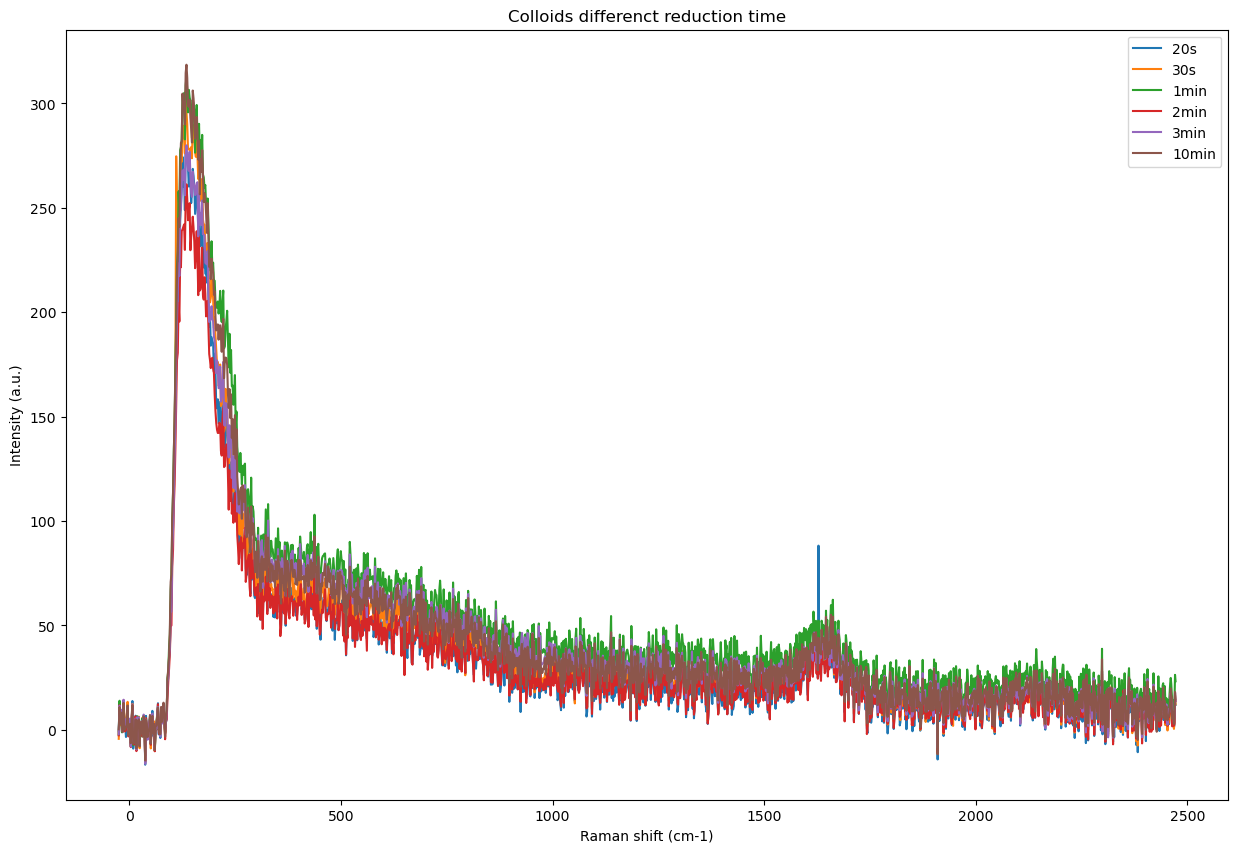

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, np.mean(colloids_20s, axis=0), label='20s')
plt.plot(f_sup, np.mean(colloids_30s, axis=0), label='30s')
plt.plot(f_sup, np.mean(colloids_1min, axis=0), label='1min')
plt.plot(f_sup, np.mean(colloids_2min, axis=0), label='2min')
plt.plot(f_sup, np.mean(colloids_3min, axis=0), label='3min')
plt.plot(f_sup, np.mean(colloids_10min, axis=0), label='10min')
plt.legend()
plt.title('Colloids differenct reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

In [8]:
# Define the list of 6 distinct colors
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00']

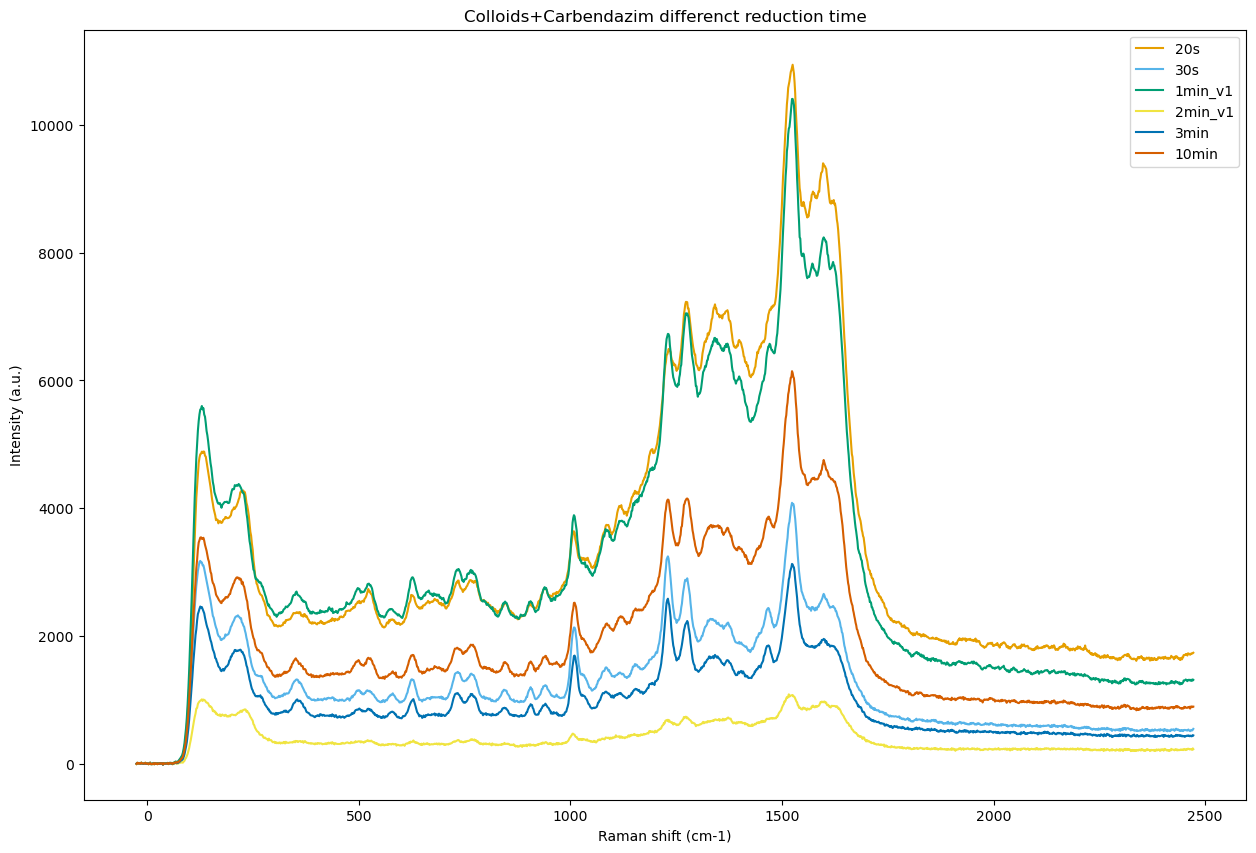

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, np.mean(car_20s, axis=0), label='20s', color=colors[0])
plt.plot(f_sup, np.mean(car_30s, axis=0), label='30s', color=colors[1])
plt.plot(f_sup, np.mean(car_1min_v1, axis=0), label='1min_v1', color=colors[2])
# plt.plot(f_sup, np.mean(car_1min_v2, axis=0), label='1min_v2')
# plt.plot(f_sup, np.mean(car_1min_after20min, axis=0), label='1min_after20min')
# plt.plot(f_sup, np.mean(car_1min_after25min, axis=0), label='1min_after25min')
plt.plot(f_sup, np.mean(car_2min_v1, axis=0), label='2min_v1', color=colors[3])
# plt.plot(f_sup, np.mean(car_2min_v2, axis=0), label='2min_v2')
plt.plot(f_sup, np.mean(car_3min, axis=0), label='3min', color=colors[4])
plt.plot(f_sup, np.mean(car_10min, axis=0), label='10min', color=colors[5])
plt.legend()
plt.title('Colloids+Carbendazim differenct reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

Plot with peaks

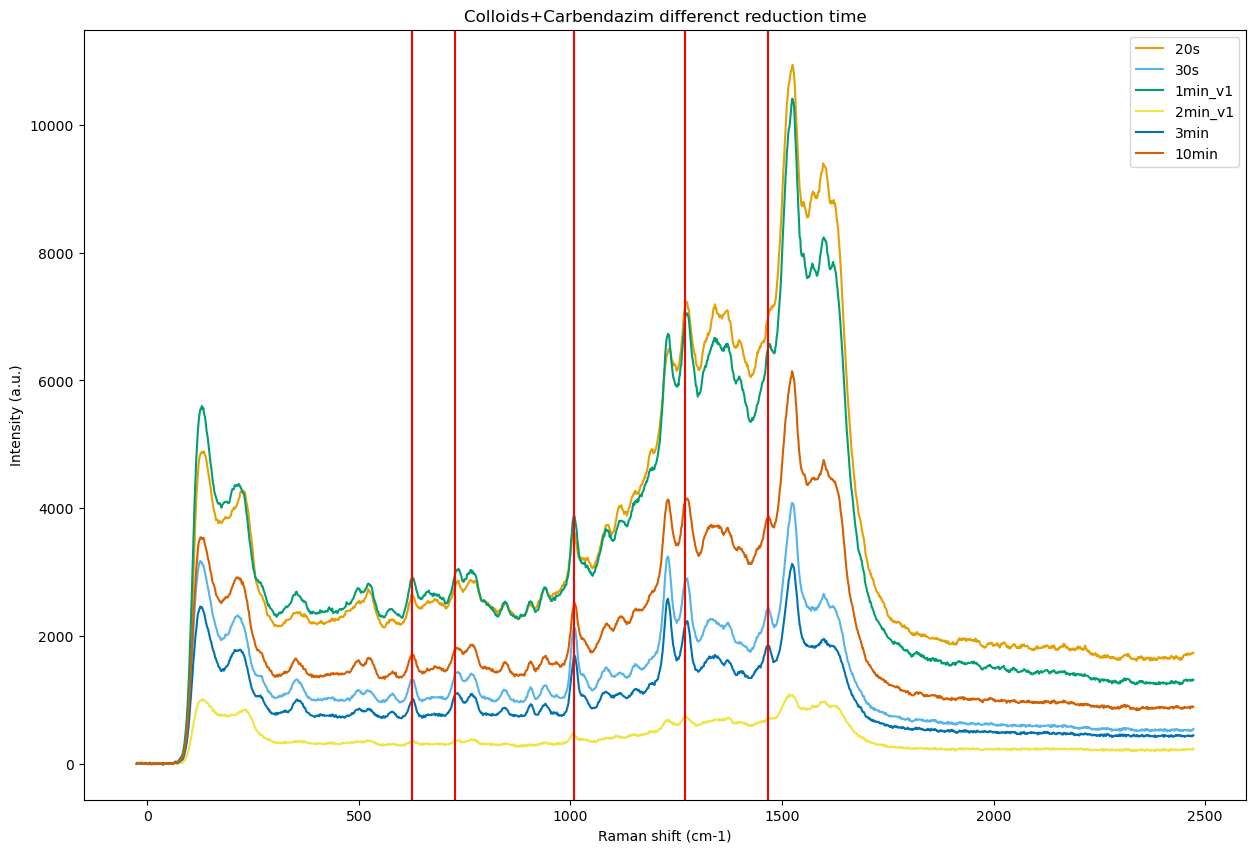

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup, np.mean(car_20s, axis=0), label='20s', color=colors[0])
plt.plot(f_sup, np.mean(car_30s, axis=0), label='30s', color=colors[1])
plt.plot(f_sup, np.mean(car_1min_v1, axis=0), label='1min_v1', color=colors[2])
plt.plot(f_sup, np.mean(car_2min_v1, axis=0), label='2min_v1', color=colors[3])
plt.plot(f_sup, np.mean(car_3min, axis=0), label='3min', color=colors[4])
plt.plot(f_sup, np.mean(car_10min, axis=0), label='10min', color=colors[5])
for pos in carbendazim_peaks:
    plt.axvline(x=pos, color='r')
plt.legend()
plt.title('Colloids+Carbendazim differenct reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

### Read the data from 29/10/2021

Carbendazim

In [11]:
f_sup_29, car_29_20s = rd.read_data('data/20211029 multiple colloidal SERS test/1/1_20_sec_coll_6X6_spectral_mapping_1s_msrmnt_2.tif')
_, car_29_30s = rd.read_data('data/20211029 multiple colloidal SERS test/1/1_30_sec_coll_6X6_spectral_mapping_1s_msrmnt_2.tif')
_, car_29_1min = rd.read_data('data/20211029 multiple colloidal SERS test/1/1_1_min_coll_6X6_spectral_mapping_1s_msrmnt_2.tif')
_, car_29_2min = rd.read_data('data/20211029 multiple colloidal SERS test/1/1_2_min_coll_6X6_spectral_mapping_1s_msrmnt_2.tif')
_, car_29_3min = rd.read_data('data/20211029 multiple colloidal SERS test/1/1_3_min_coll_6X6_spectral_mapping_1s_msrmnt_2.tif')
_, car_29_10min = rd.read_data('data/20211029 multiple colloidal SERS test/1/1_10_min_coll_6X6_spectral_mapping_1s_msrmnt_2.tif')

Acetamiprid

In [12]:
_, aceta_29_20s = rd.read_data('data/20211029 multiple colloidal SERS test/4/4_20_sec_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceta_29_30s = rd.read_data('data/20211029 multiple colloidal SERS test/4/4_30_sec_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceta_29_1min = rd.read_data('data/20211029 multiple colloidal SERS test/4/4_1_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceta_29_2min = rd.read_data('data/20211029 multiple colloidal SERS test/4/4_2_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceta_29_3min = rd.read_data('data/20211029 multiple colloidal SERS test/4/4_3_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceta_29_10min = rd.read_data('data/20211029 multiple colloidal SERS test/4/4_10_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')

Acephate

In [13]:
_, aceph_29_20s = rd.read_data('data/20211029 multiple colloidal SERS test/5/5_20_sec_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceph_29_30s = rd.read_data('data/20211029 multiple colloidal SERS test/5/5_30_sec_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceph_29_1min = rd.read_data('data/20211029 multiple colloidal SERS test/5/5_1_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceph_29_2min = rd.read_data('data/20211029 multiple colloidal SERS test/5/5_2_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceph_29_3min = rd.read_data('data/20211029 multiple colloidal SERS test/5/5_3_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')
_, aceph_29_10min = rd.read_data('data/20211029 multiple colloidal SERS test/5/5_10_min_coll_6X6_spectral_mapping_1s_msrmnt_4.tif')

Normalized spectra

In [14]:
# Carbendazim from 29/10/2021
car_29_20s_norm = (np.mean(car_29_20s, axis=0) - np.min(np.mean(car_29_20s, axis=0))) / (np.max(np.mean(car_29_20s, axis=0)) - np.min(np.mean(car_29_20s, axis=0)))
car_29_30s_norm = (np.mean(car_29_30s, axis=0) - np.min(np.mean(car_29_30s, axis=0))) / (np.max(np.mean(car_29_30s, axis=0)) - np.min(np.mean(car_29_30s, axis=0)))
car_29_1min_norm = (np.mean(car_29_1min, axis=0) - np.min(np.mean(car_29_1min, axis=0))) / (np.max(np.mean(car_29_1min, axis=0)) - np.min(np.mean(car_29_1min, axis=0)))
car_29_2min_norm = (np.mean(car_29_2min, axis=0) - np.min(np.mean(car_29_2min, axis=0))) / (np.max(np.mean(car_29_2min, axis=0)) - np.min(np.mean(car_29_2min, axis=0)))
car_29_3min_norm = (np.mean(car_29_3min, axis=0) - np.min(np.mean(car_29_3min, axis=0))) / (np.max(np.mean(car_29_3min, axis=0)) - np.min(np.mean(car_29_3min, axis=0)))
car_29_10min_norm = (np.mean(car_29_10min, axis=0) - np.min(np.mean(car_29_10min, axis=0))) / (np.max(np.mean(car_29_10min, axis=0)) - np.min(np.mean(car_29_10min, axis=0)))

In [15]:
# Acetamiprid from 29/10/2021
aceta_29_20s_norm = (np.mean(aceta_29_20s, axis=0) - np.min(np.mean(aceta_29_20s, axis=0))) / (np.max(np.mean(aceta_29_20s, axis=0)) - np.min(np.mean(aceta_29_20s, axis=0)))
aceta_29_30s_norm = (np.mean(aceta_29_30s, axis=0) - np.min(np.mean(aceta_29_30s, axis=0))) / (np.max(np.mean(aceta_29_30s, axis=0)) - np.min(np.mean(aceta_29_30s, axis=0)))
aceta_29_1min_norm = (np.mean(aceta_29_1min, axis=0) - np.min(np.mean(aceta_29_1min, axis=0))) / (np.max(np.mean(aceta_29_1min, axis=0)) - np.min(np.mean(aceta_29_1min, axis=0)))
aceta_29_2min_norm = (np.mean(aceta_29_2min, axis=0) - np.min(np.mean(aceta_29_2min, axis=0))) / (np.max(np.mean(aceta_29_2min, axis=0)) - np.min(np.mean(aceta_29_2min, axis=0)))
aceta_29_3min_norm = (np.mean(aceta_29_3min, axis=0) - np.min(np.mean(aceta_29_3min, axis=0))) / (np.max(np.mean(aceta_29_3min, axis=0)) - np.min(np.mean(aceta_29_3min, axis=0)))
aceta_29_10min_norm = (np.mean(aceta_29_10min, axis=0) - np.min(np.mean(aceta_29_10min, axis=0))) / (np.max(np.mean(aceta_29_10min, axis=0)) - np.min(np.mean(aceta_29_10min, axis=0)))

In [16]:
# Acephate from 29/10/2021
aceph_29_20s_norm = (np.mean(aceph_29_20s, axis=0) - np.min(np.mean(aceph_29_20s, axis=0))) / (np.max(np.mean(aceph_29_20s, axis=0)) - np.min(np.mean(aceph_29_20s, axis=0)))
aceph_29_30s_norm = (np.mean(aceph_29_30s, axis=0) - np.min(np.mean(aceph_29_30s, axis=0))) / (np.max(np.mean(aceph_29_30s, axis=0)) - np.min(np.mean(aceph_29_30s, axis=0)))
aceph_29_1min_norm = (np.mean(aceph_29_1min, axis=0) - np.min(np.mean(aceph_29_1min, axis=0))) / (np.max(np.mean(aceph_29_1min, axis=0)) - np.min(np.mean(aceph_29_1min, axis=0)))
aceph_29_2min_norm = (np.mean(aceph_29_2min, axis=0) - np.min(np.mean(aceph_29_2min, axis=0))) / (np.max(np.mean(aceph_29_2min, axis=0)) - np.min(np.mean(aceph_29_2min, axis=0)))
aceph_29_3min_norm = (np.mean(aceph_29_3min, axis=0) - np.min(np.mean(aceph_29_3min, axis=0))) / (np.max(np.mean(aceph_29_3min, axis=0)) - np.min(np.mean(aceph_29_3min, axis=0)))
aceph_29_10min_norm = (np.mean(aceph_29_10min, axis=0) - np.min(np.mean(aceph_29_10min, axis=0))) / (np.max(np.mean(aceph_29_10min, axis=0)) - np.min(np.mean(aceph_29_10min, axis=0)))

Smoothed spectra

In [17]:
car_29_20s_norm_smooth = savgol_filter(car_29_20s_norm, 31, 3)
car_29_30s_norm_smooth = savgol_filter(car_29_30s_norm, 31, 3)
car_29_1min_norm_smooth = savgol_filter(car_29_1min_norm, 31, 3)
car_29_2min_norm_smooth = savgol_filter(car_29_2min_norm, 31, 3)
car_29_3min_norm_smooth = savgol_filter(car_29_3min_norm, 31, 3)
car_29_10min_norm_smooth = savgol_filter(car_29_10min_norm, 31, 3)

In [18]:
aceta_29_20s_norm_smooth = savgol_filter(aceta_29_20s_norm, 31, 3)
aceta_29_30s_norm_smooth = savgol_filter(aceta_29_30s_norm, 31, 3)
aceta_29_1min_norm_smooth = savgol_filter(aceta_29_1min_norm, 31, 3)
aceta_29_2min_norm_smooth = savgol_filter(aceta_29_2min_norm, 31, 3)
aceta_29_3min_norm_smooth = savgol_filter(aceta_29_3min_norm, 31, 3)
aceta_29_10min_norm_smooth = savgol_filter(aceta_29_10min_norm, 31, 3)

In [19]:
aceph_29_20s_norm_smooth = savgol_filter(aceph_29_20s_norm, 31, 3)
aceph_29_30s_norm_smooth = savgol_filter(aceph_29_30s_norm, 31, 3)
aceph_29_1min_norm_smooth = savgol_filter(aceph_29_1min_norm, 31, 3)
aceph_29_2min_norm_smooth = savgol_filter(aceph_29_2min_norm, 31, 3)
aceph_29_3min_norm_smooth = savgol_filter(aceph_29_3min_norm, 31, 3)
aceph_29_10min_norm_smooth = savgol_filter(aceph_29_10min_norm, 31, 3)

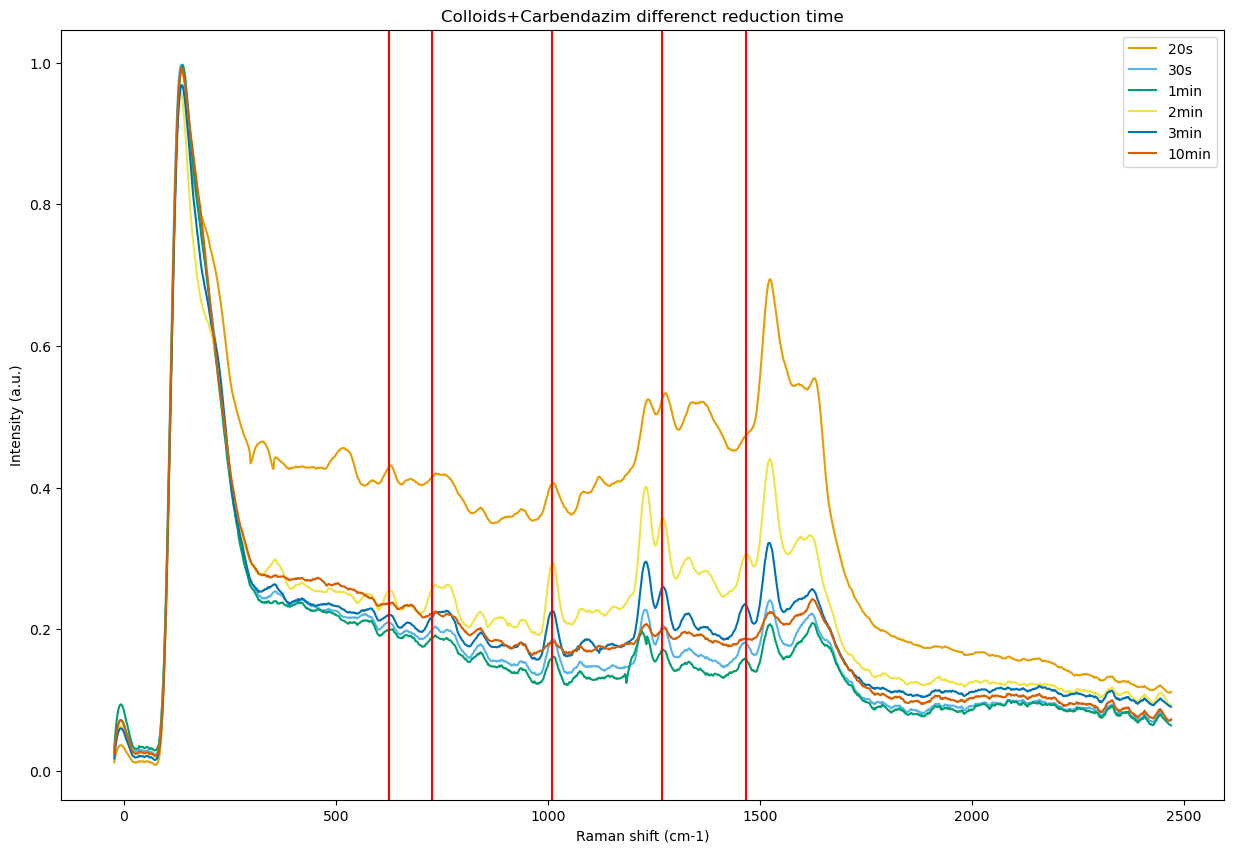

In [23]:
plt.figure(figsize=(15, 10))
strt_idx = 0
end_idx = -1
plt.plot(f_sup_29[strt_idx:end_idx], car_29_20s_norm_smooth[strt_idx:end_idx], label='20s', color=colors[0])
plt.plot(f_sup_29[strt_idx:end_idx], car_29_30s_norm_smooth[strt_idx:end_idx], label='30s', color=colors[1])
plt.plot(f_sup_29[strt_idx:end_idx], car_29_1min_norm_smooth[strt_idx:end_idx], label='1min', color=colors[2])
plt.plot(f_sup_29[strt_idx:end_idx], car_29_2min_norm_smooth[strt_idx:end_idx], label='2min', color=colors[3])
plt.plot(f_sup_29[strt_idx:end_idx], car_29_3min_norm_smooth[strt_idx:end_idx], label='3min', color=colors[4])
plt.plot(f_sup_29[strt_idx:end_idx], car_29_10min_norm_smooth[strt_idx:end_idx], label='10min', color=colors[5])
for pos in carbendazim_peaks:
    plt.axvline(x=pos, color='r')
plt.legend()
plt.title('Colloids+Carbendazim differenct reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

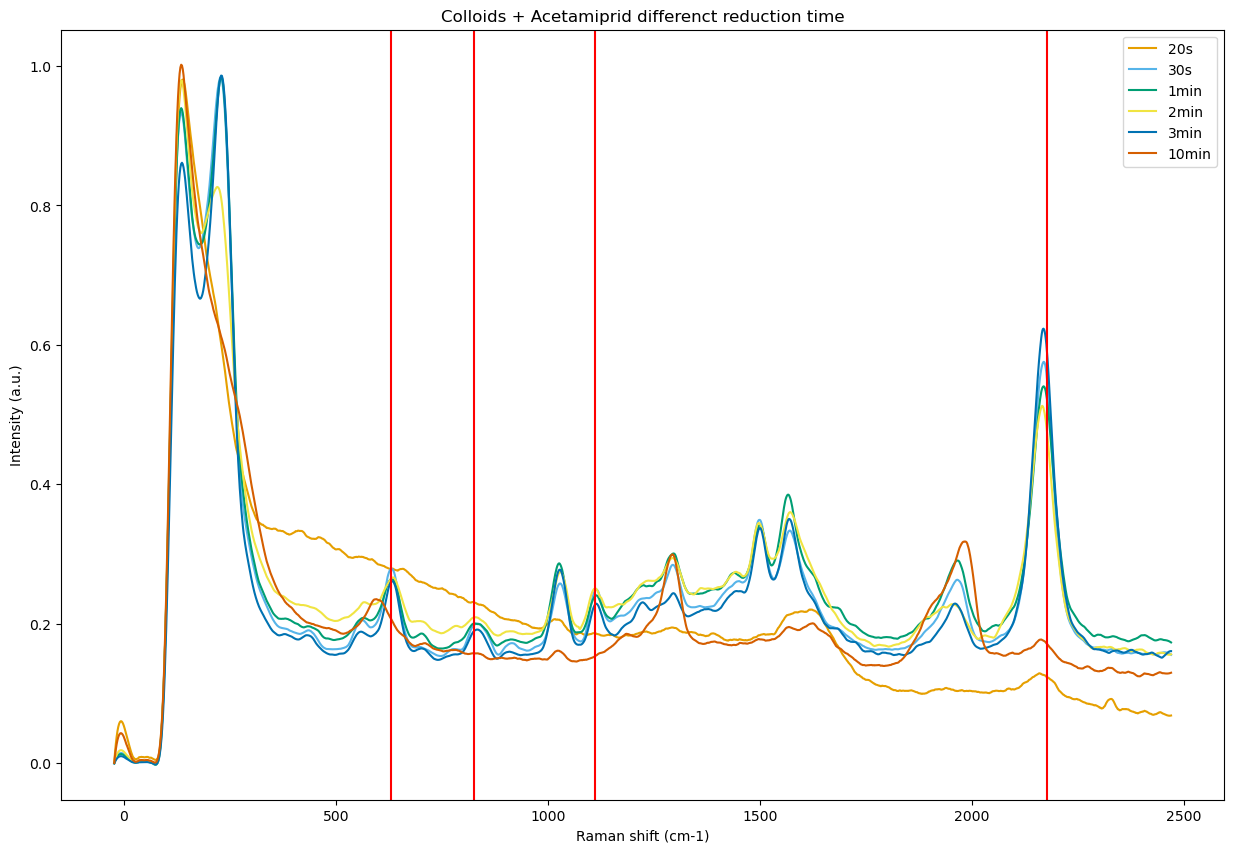

In [22]:
plt.figure(figsize=(15, 10))
strt_idx = 0
end_idx = -1
plt.plot(f_sup_29[strt_idx:end_idx], aceta_29_20s_norm_smooth[strt_idx:end_idx], label='20s', color=colors[0])    
plt.plot(f_sup_29[strt_idx:end_idx], aceta_29_30s_norm_smooth[strt_idx:end_idx],  label='30s', color=colors[1])
plt.plot(f_sup_29[strt_idx:end_idx], aceta_29_1min_norm_smooth[strt_idx:end_idx], label='1min', color=colors[2])
plt.plot(f_sup_29[strt_idx:end_idx], aceta_29_2min_norm_smooth[strt_idx:end_idx], label='2min', color=colors[3])
plt.plot(f_sup_29[strt_idx:end_idx], aceta_29_3min_norm_smooth[strt_idx:end_idx], label='3min', color=colors[4])                      
plt.plot(f_sup_29[strt_idx:end_idx], aceta_29_10min_norm_smooth[strt_idx:end_idx], label='10min', color=colors[5])
for pos in acetamiprid_peaks:
    plt.axvline(x=pos, color='r')
plt.legend()
plt.title('Colloids + Acetamiprid differenct reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

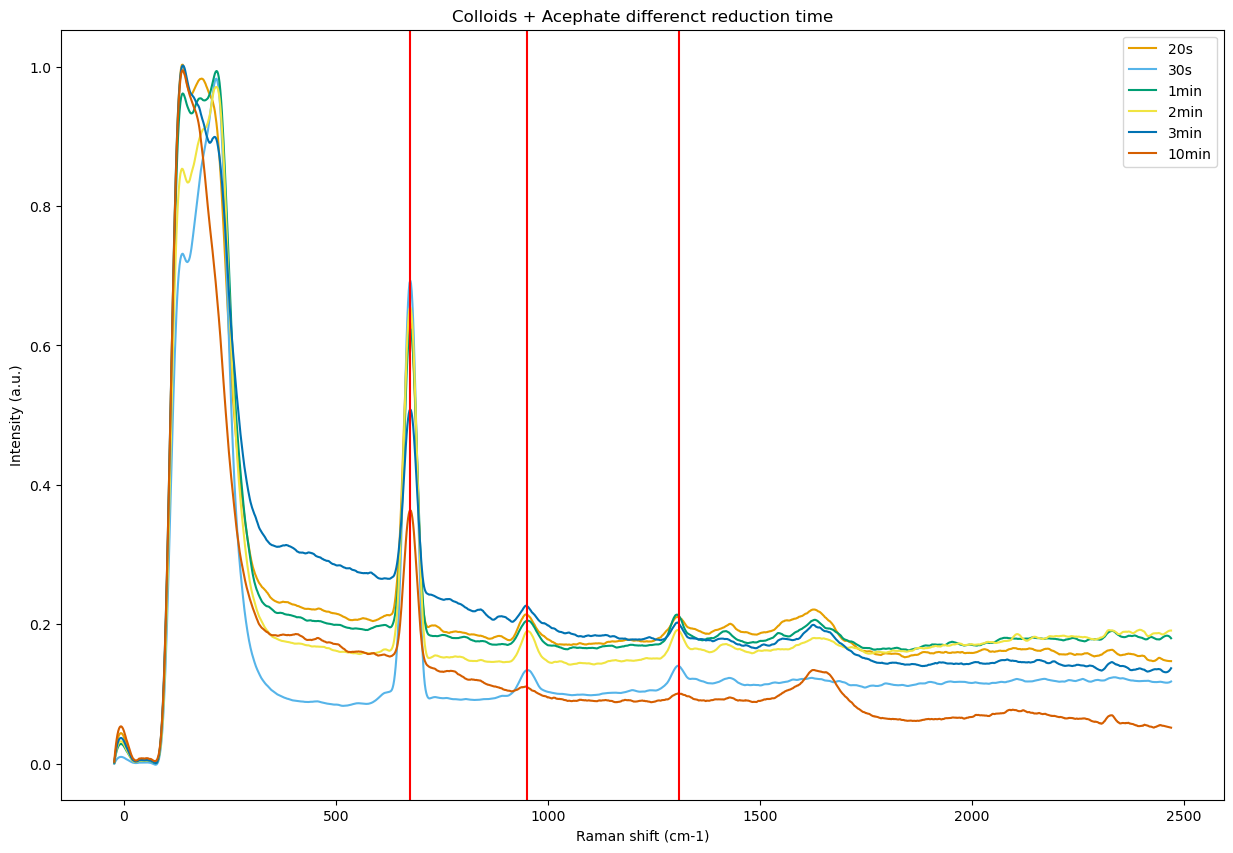

In [24]:
plt.figure(figsize=(15, 10))
strt_idx = 0
end_idx = -1
plt.plot(f_sup_29[strt_idx:end_idx], aceph_29_20s_norm_smooth[strt_idx:end_idx], label='20s', color=colors[0])
plt.plot(f_sup_29[strt_idx:end_idx], aceph_29_30s_norm_smooth[strt_idx:end_idx], label='30s', color=colors[1])
plt.plot(f_sup_29[strt_idx:end_idx], aceph_29_1min_norm_smooth[strt_idx:end_idx], label='1min', color=colors[2])
plt.plot(f_sup_29[strt_idx:end_idx], aceph_29_2min_norm_smooth[strt_idx:end_idx], label='2min', color=colors[3])
plt.plot(f_sup_29[strt_idx:end_idx], aceph_29_3min_norm_smooth[strt_idx:end_idx], label='3min', color=colors[4])
plt.plot(f_sup_29[strt_idx:end_idx], aceph_29_10min_norm_smooth[strt_idx:end_idx], label='10min', color=colors[5])
plt.axvline(x=675, color='r')
plt.axvline(x=950, color='r')
plt.axvline(x=1310, color='r')
plt.legend()
plt.title('Colloids + Acephate differenct reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

### Polynomial interpolation of the peaks' baseline.

In [27]:
# Find the index of each peak in carbendazim_peaks in f_sup array.
carbendazim_peaks_index = np.zeros(len(carbendazim_peaks), dtype=int)
for i in range(len(carbendazim_peaks)):
    carbendazim_peaks_index[i] = np.argmin(np.abs(f_sup_29 - carbendazim_peaks[i]))

In [28]:
# Find the index of each peak in acetamiprid_peaks in f_sup_0810 array
acetamiprid_peaks_index = np.zeros(len(acetamiprid_peaks), dtype=int)
for i in range(len(acetamiprid_peaks)):
    acetamiprid_peaks_index[i] = np.argmin(np.abs(f_sup_29 - acetamiprid_peaks[i]))

In [29]:
# Find the index of each peak in acephate_peaks in f_sup_0810 array
acephate_peaks_index = np.zeros(len(acephate_peaks), dtype=int)
for i in range(len(acephate_peaks)):
    acephate_peaks_index[i] = np.argmin(np.abs(f_sup_29 - acephate_peaks[i]))

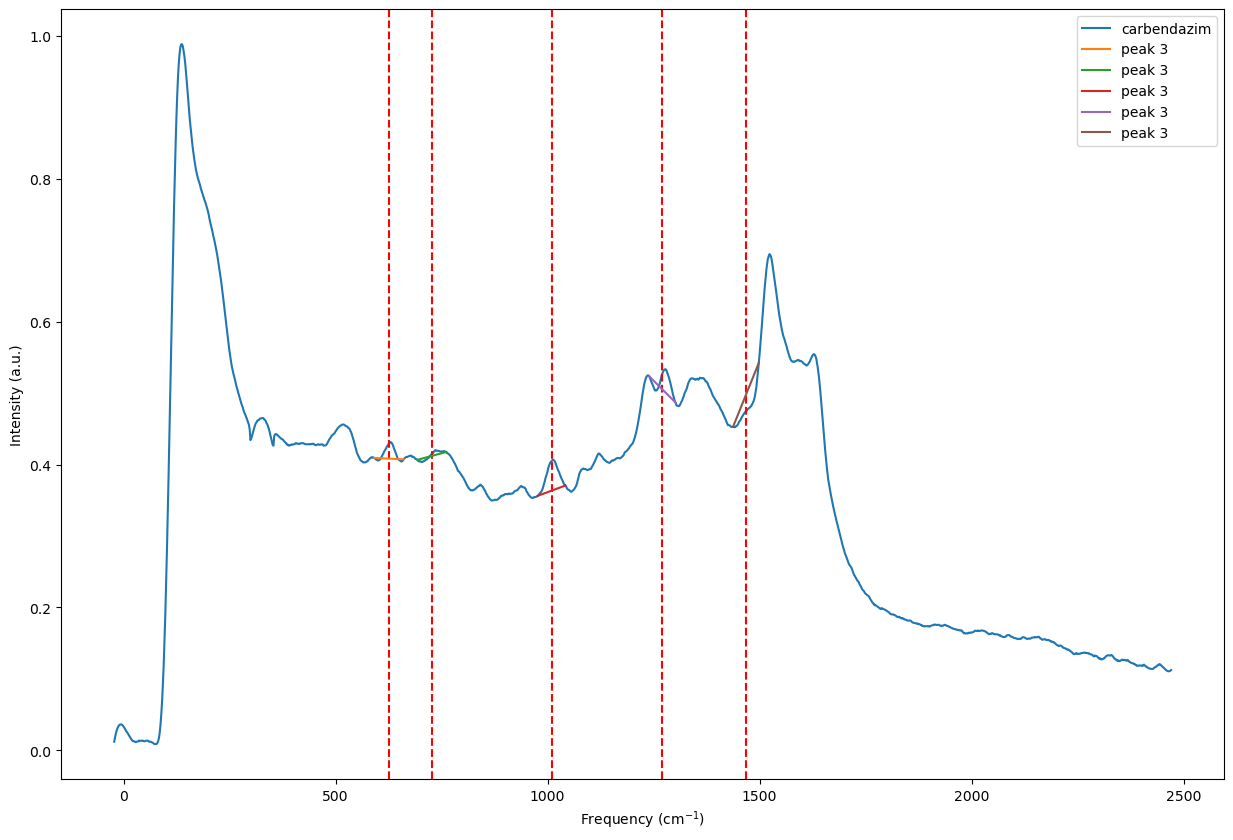

In [31]:
deg = 1
signal = np.copy(car_29_20s_norm_smooth)
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, car_29_20s_norm_smooth, label="carbendazim")
for peak in carbendazim_peaks_index:
    plt.axvline(x=f_sup_29[peak], color="red", linestyle="--")
    # # Plot points 10 cm-1 to the left and right of the peak
    # plt.scatter(f_sup_0810[peak - 10:peak + 10], car_power_time_evol_mean_smooth[4, 0, peak - 10:peak + 10], color="red", s=10)

    # # Polynomial interpolation of the baseline of the peak
    # x = f_sup_0810[peak - 20: peak + 21]
    # y = car_power_time_evol_mean_smooth[4, 0, peak - 20: peak + 21]
    # # print("x shape:", x.shape)
    # # print("y shape:", y.shape)
    # carbendazim_peaks_interpol[i, :] = np.polyfit(x, y, deg)
    # plt.plot(x, np.polyval(carbendazim_peaks_interpol[i, :], x), label="peak " + str(i))

    # Interpolation of the peak baseline using linear interpolation
    x_interp = np.linspace(f_sup_29[peak - 20], f_sup_29[peak + 20], 41)
    y_interp = np.linspace(signal[peak - 20], signal[peak + 20], 41)

    plt.plot(x_interp, y_interp, label=f"peak {str(i)}")
# Plot points 10 cm-1 to the left and 15 cm-1 to the right of the 2nd to last peak of carbendazim_peaks_index
# plt.scatter(f_sup_0810[carbendazim_peaks_index[-2] - 20:carbendazim_peaks_index[-2] + 15], car_power_time_evol_mean_smooth[4, 0, carbendazim_peaks_index[-2] - 15:carbendazim_peaks_index[-2] + 20], color="red", s=10)

plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

### Side by side individual comparison

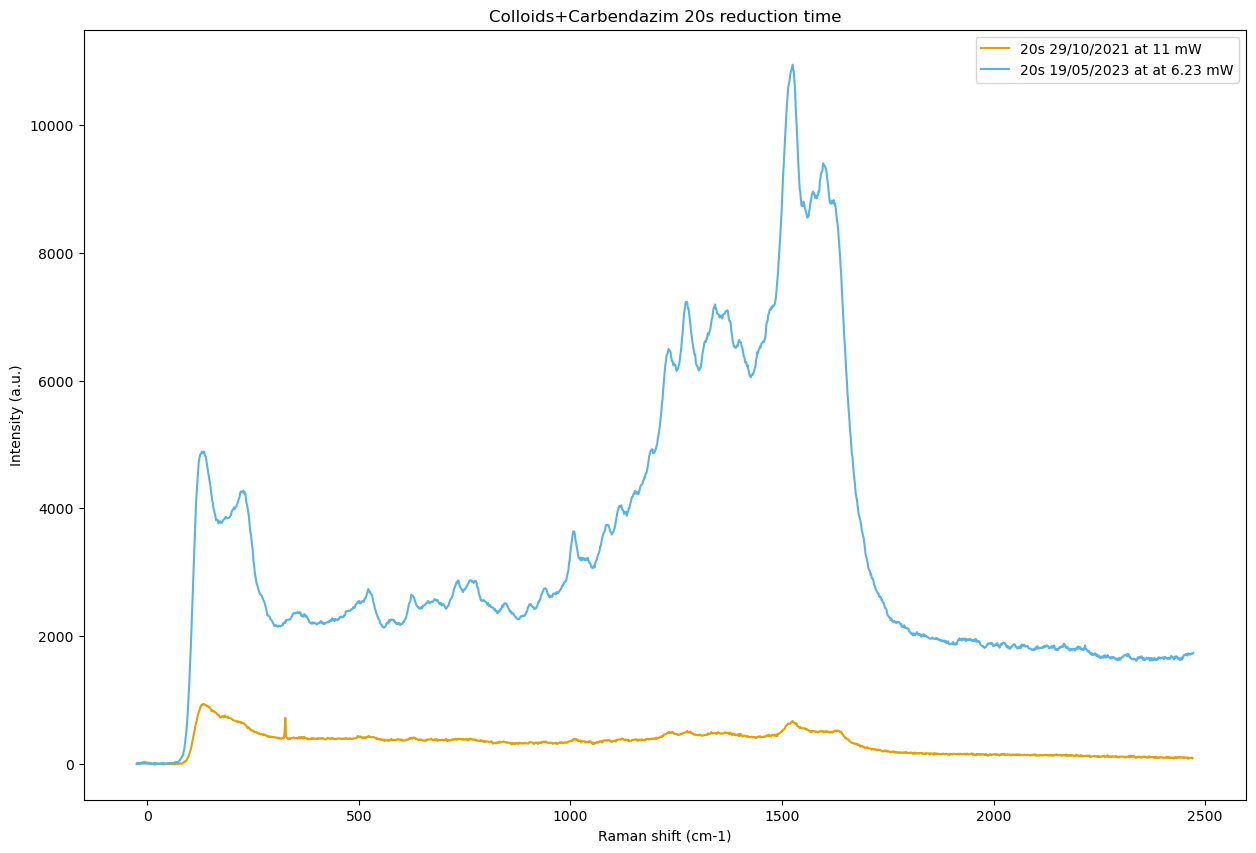

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, np.mean(car_29_20s, axis=0), label='20s 29/10/2021 at 11 mW', color=colors[0])
plt.plot(f_sup, np.mean(car_20s, axis=0), label='20s 19/05/2023 at at 6.23 mW', color=colors[1])
plt.legend()
plt.title('Colloids+Carbendazim 20s reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

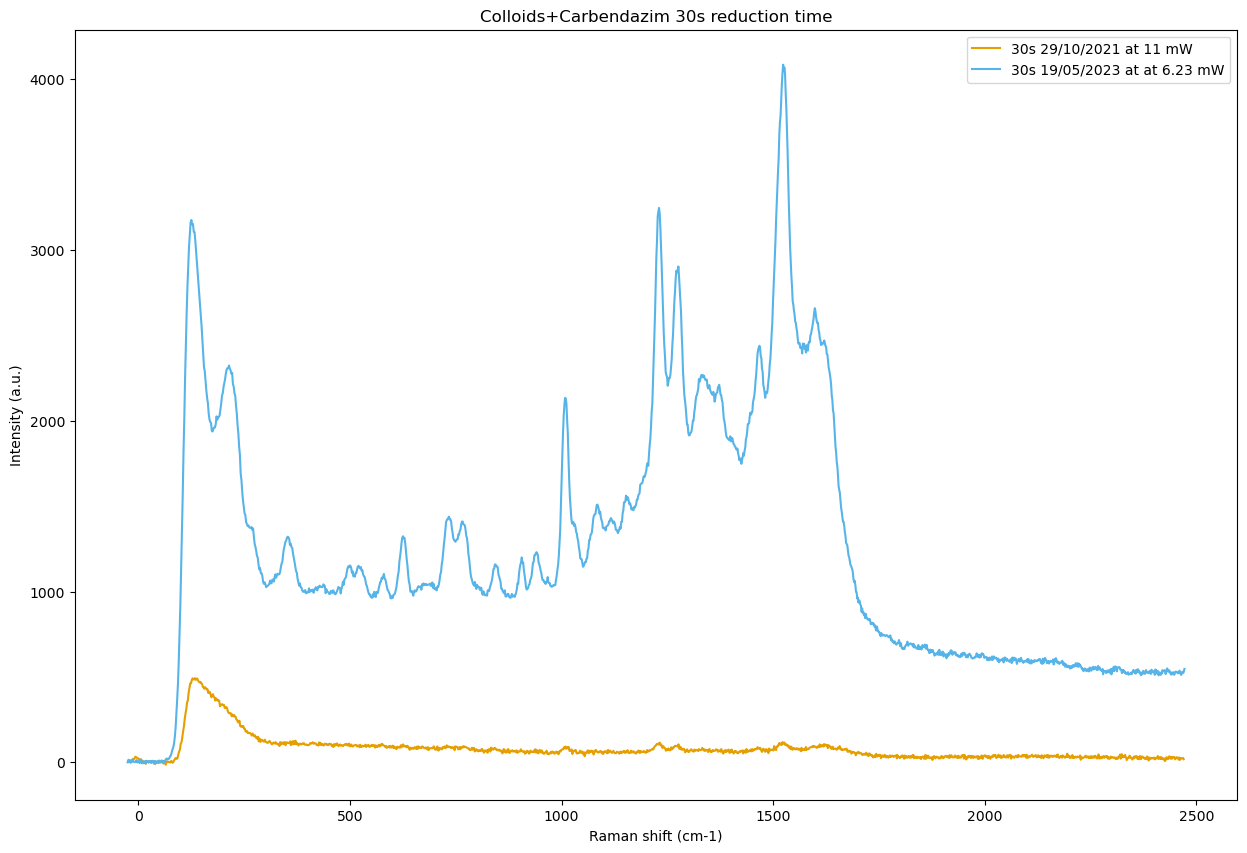

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, np.mean(car_29_30s, axis=0), label='30s 29/10/2021 at 11 mW', color=colors[0])
plt.plot(f_sup, np.mean(car_30s, axis=0), label='30s 19/05/2023 at at 6.23 mW', color=colors[1])
plt.legend()
plt.title('Colloids+Carbendazim 30s reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

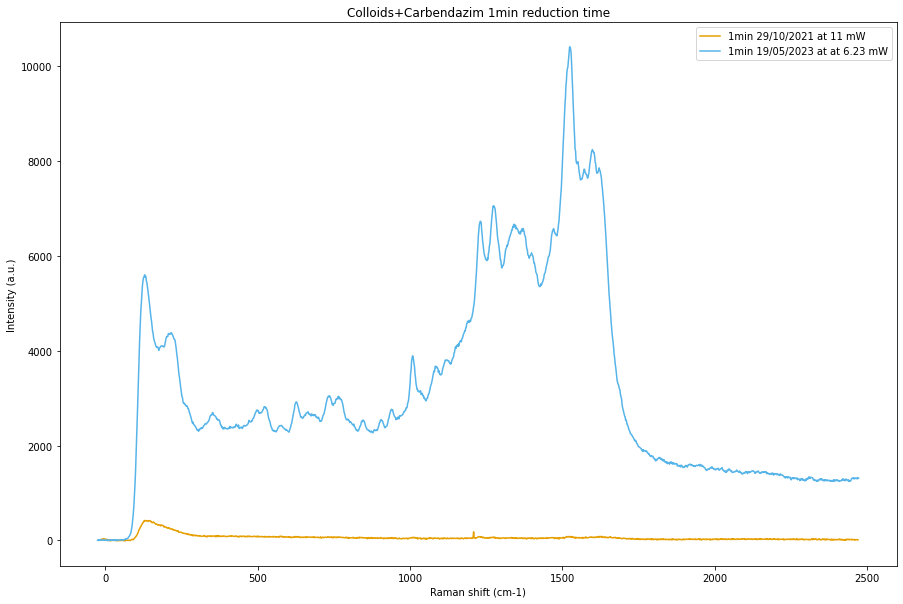

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, np.mean(car_29_1min, axis=0), label='1min 29/10/2021 at 11 mW', color=colors[0])
plt.plot(f_sup, np.mean(car_1min_v1, axis=0), label='1min 19/05/2023 at at 6.23 mW', color=colors[1])
plt.legend()
plt.title('Colloids+Carbendazim 1min reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

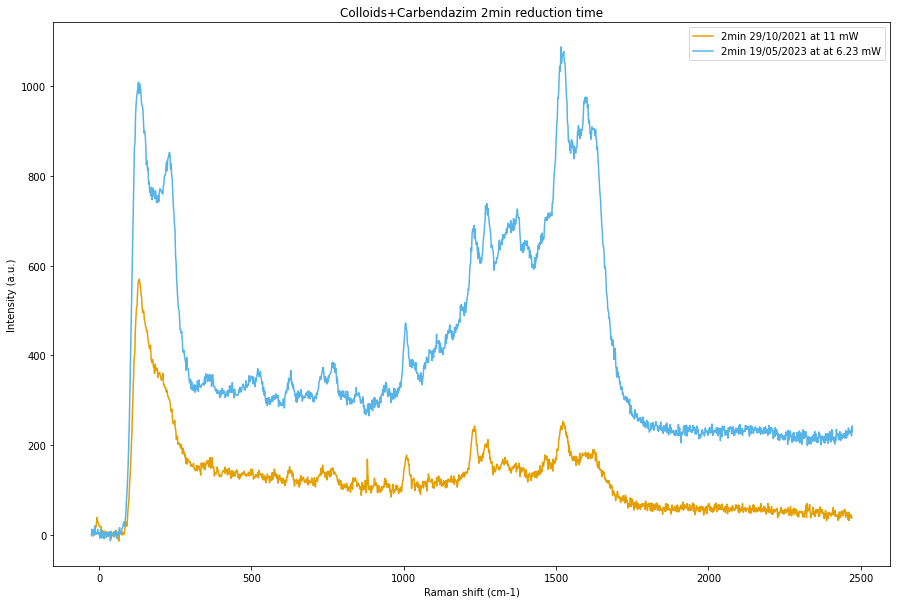

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, np.mean(car_29_2min, axis=0), label='2min 29/10/2021 at 11 mW', color=colors[0])
plt.plot(f_sup, np.mean(car_2min_v1, axis=0), label='2min 19/05/2023 at at 6.23 mW', color=colors[1])
plt.legend()
plt.title('Colloids+Carbendazim 2min reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

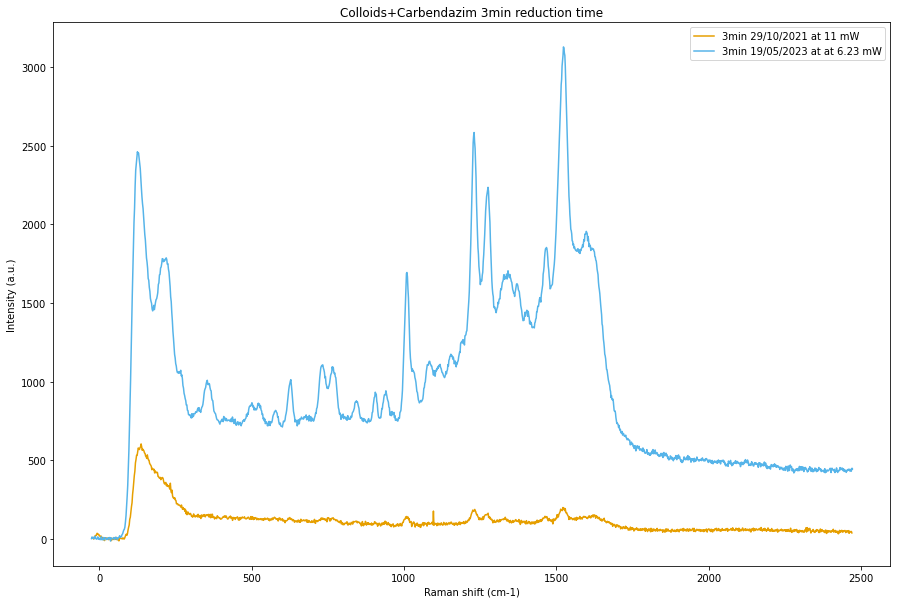

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, np.mean(car_29_3min, axis=0), label='3min 29/10/2021 at 11 mW', color=colors[0])
plt.plot(f_sup, np.mean(car_3min, axis=0), label='3min 19/05/2023 at at 6.23 mW', color=colors[1])
plt.legend()
plt.title('Colloids+Carbendazim 3min reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()

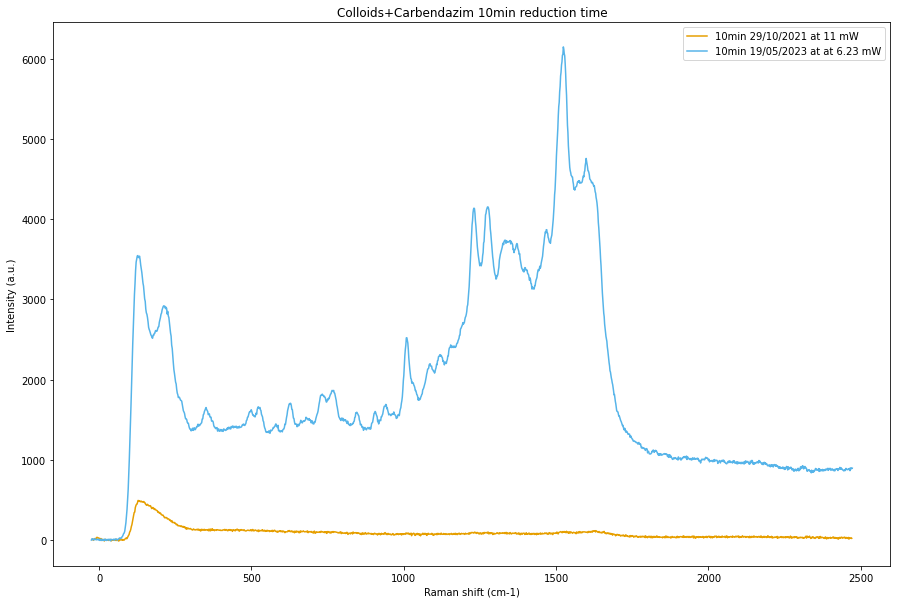

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_29, np.mean(car_29_10min, axis=0), label='10min 29/10/2021 at 11 mW', color=colors[0])
plt.plot(f_sup, np.mean(car_10min, axis=0), label='10min 19/05/2023 at at 6.23 mW', color=colors[1])
plt.legend()
plt.title('Colloids+Carbendazim 10min reduction time')
plt.xlabel('Raman shift (cm-1)')
plt.ylabel('Intensity (a.u.)')
plt.show()